<a href="https://colab.research.google.com/github/tugbargn/Cloud-Classification/blob/main/cloud_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Datasets/Train",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Datasets/Validation",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Datasets/Test",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

class_names_dict = train_generator.class_indices
class_names = ['Clear Sky','Patterned Clouds','Thick Dark Clouds','Thick White Clouds','Thin White Clouds','Veil Clouds']
print(class_names)




Found 1891 images belonging to 6 classes.
Found 478 images belonging to 6 classes.
Found 515 images belonging to 6 classes.
['Clear Sky', 'Patterned Clouds', 'Thick Dark Clouds', 'Thick White Clouds', 'Thin White Clouds', 'Veil Clouds']


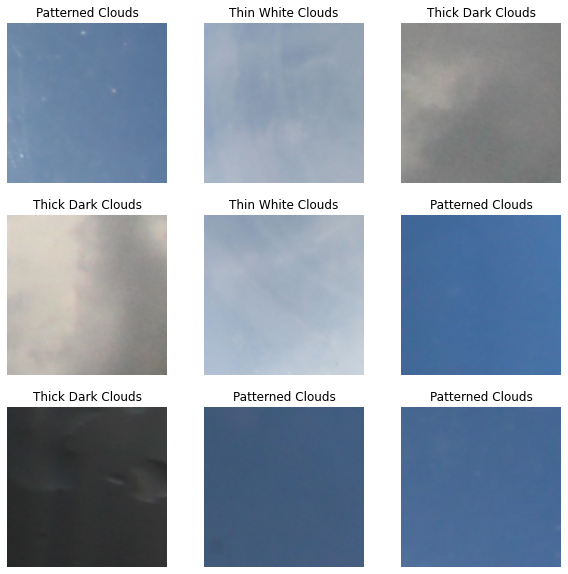

In [73]:
import matplotlib.pyplot as plt

#9 pictures in train set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [74]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_generator = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

(32, 224, 224, 3)
(32,)


In [75]:
num_classes = 5

densenet = DenseNet201(weights='imagenet', include_top=False)

input = Input(shape=(224, 224, 3))
x = Convolution2D(3, (3, 3), padding='same')(input)
    
x = densenet(x)
    
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# multi output
output = Dense(6,activation = 'softmax', name='root')(x)
 

# model
model = Model(input,output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)
model.save_weights('cnn_data_augmentation.h5')

Epoch 1/10
20/20 [==============================] - 767s 37s/step - loss: 1.1952 - accuracy: 0.6702 - val_loss: 40.5007 - val_accuracy: 0.1410
Epoch 2/10
20/20 [==============================] - 737s 37s/step - loss: 0.2833 - accuracy: 0.9057 - val_loss: 85.5101 - val_accuracy: 0.2692
Epoch 3/10
20/20 [==============================] - 742s 37s/step - loss: 0.1417 - accuracy: 0.9619 - val_loss: 61.2967 - val_accuracy: 0.2179
Epoch 4/10
20/20 [==============================] - 744s 37s/step - loss: 0.2140 - accuracy: 0.9509 - val_loss: 88.6974 - val_accuracy: 0.1410
Epoch 5/10
20/20 [==============================] - 742s 37s/step - loss: 0.1216 - accuracy: 0.9577 - val_loss: 10.0551 - val_accuracy: 0.5192
Epoch 6/10
20/20 [==============================] - 740s 37s/step - loss: 0.0769 - accuracy: 0.9786 - val_loss: 0.6087 - val_accuracy: 0.8910
Epoch 7/10
20/20 [==============================] - 727s 36s/step - loss: 0.1307 - accuracy: 0.9726 - val_loss: 13.5250 - val_accuracy: 0.4808


In [ ]:
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'best')
plt.show()

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'best')
plt.show()
